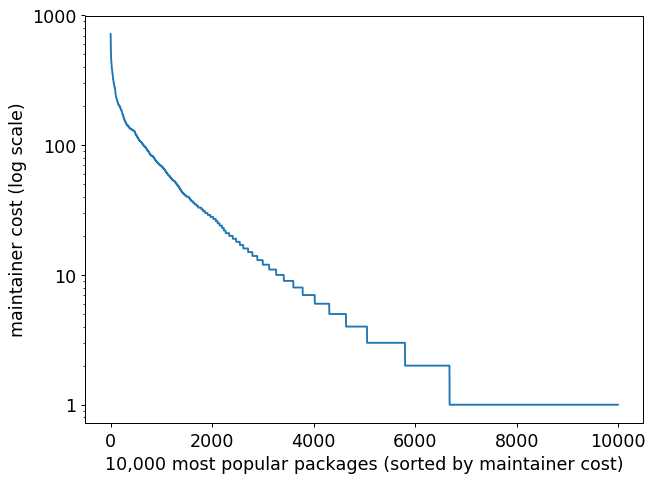

In [37]:
import pandas as pd
import math
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=90)

plt.rcParams.update({'font.size': 14})

data = pd.read_json('maintainer_cost_latest_10k.json')
   
plt.xlabel('10,000 most popular packages (sorted by maintainer cost)')
plt.ylabel('maintainer cost (log scale)')
plt.plot(data["Value"][:9994])
plt.gca().set_yscale("log")
plt.gca().set_yticklabels(['{:.0f}'.format(x)
                           for x in plt.gca().get_yticks()])

plt.savefig("maintainer_cost_latest_10k.png")

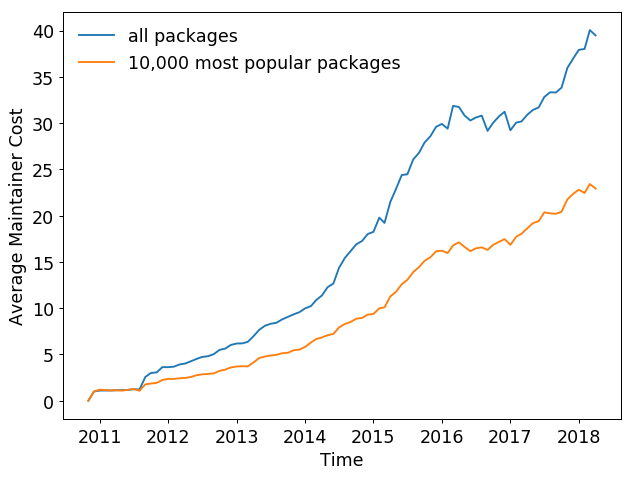

In [7]:
plt.figure(figsize=(8,6), dpi=90)

plt.rcParams.update({'font.size': 14})

def transformDf(df, key):
    df[key] = pd.to_datetime(df[key])
    df = df.set_index(key)
    return df

mostPopularAvg = pd.read_json('average_maintainer_cost_10k.json')
globalAvg = pd.read_json('average_maintainer_cost_global.json')

mostPopularAvg = transformDf(mostPopularAvg, "Key")
globalAvg = transformDf(globalAvg, "Key")

plt.xlabel('Time')
plt.ylabel('Average Maintainer Cost')
plt.plot(globalAvg["Value"], label='all packages')
plt.plot(mostPopularAvg["Value"], label='10,000 most popular packages')
plt.legend(loc='best', frameon=False)
plt.savefig("average_maintainer_cost.png")